<a href="https://colab.research.google.com/github/ralstonraphael/Water_Access_ML_Project/blob/main/Machine_Minds_Project_Ralston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Health Organization Life Expectancy in Python
###### This notebook walks through the process of cleaning, engineering, and visualizing life expectancy data in Python. In particulure, we used the World Health Organization data from kaggle.


In [ ]:
!pip install tensorflow

In [ ]:
# csv for reading the csv file
import csv

# pandas for data manipulation
import pandas as pd

# matpoltlib for polotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

# numpy for regression
import os
import glob
import itertools
import numpy as np

# zscore for comparing values measured on different scales
from scipy.stats import zscore

# sklearn for preprocessing, model training and model evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

# tensorflow for building machine learning models and creating neural network layers
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split





### Retrieve Data from Drive
###### We will now explore the the life expectancy across 183 unique counties in 6 different regions.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
file_path = 'gdrive/MyDrive/Datasets/Life_exp.csv'

df = pd.read_csv(file_path,engine='python',index_col=False)
df.head(20)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN
5,Angola,AGO,Africa,2005,52.72512,15.75107,322.7077,0.109205,0.018945,3.48640,...,2.85220,19433.602,101.3,50.165,1.4,4060.0,NaN,2.12011,NaN,NaN
6,Angola,AGO,Africa,2006,53.82273,15.92263,313.7094,0.103120,0.017360,4.02043,...,2.68554,20149.901,96.2,51.143,1.5,4450.0,NaN,2.28146,NaN,NaN
7,Angola,AGO,Africa,2007,54.97549,16.09804,302.8322,0.096850,0.015920,4.67969,...,2.97439,20905.363,91.0,52.177,1.6,5030.0,NaN,NaN,NaN,NaN
8,Angola,AGO,Africa,2008,56.12413,16.28414,292.1559,0.090765,0.014585,5.19452,...,3.32290,21695.634,85.8,53.243,1.6,5260.0,30.1,NaN,NaN,NaN
9,Angola,AGO,Africa,2009,57.29004,16.48146,281.0492,0.084800,0.013310,6.11778,...,3.84261,22514.281,80.7,54.311,1.7,5500.0,NaN,NaN,NaN,NaN


### Obtain information on the different data types within the dataset.

In [ ]:
# Index number, column name, non null count, and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   object 
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3061 non-null   float64
 10  bmi              3077 non-null   float64
 11  age5-19thinness  3077 non-null   float64
 12  age5-19obesity   3077 non-null   float64
 13  hepatitis        2542 non-null   float64
 14  measles          3092 non-null   float64
 15  polio            3092 non-null   float64
 16  diphtheria       3092 non-null   float64
 17  basic_water   

In [ ]:
# Describes the count, mean, std, min, and percent above mean of continuous variables.
df.describe()

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3061.000000,3077.000000,3077.000000,3077.000000,...,2994.000000,3.074000e+03,3111.000000,3111.000000,2370.000000,2994.000000,913.000000,1825.00000,571.000000,805.000000
mean,2008.000000,69.146384,18.912060,193.527786,0.032496,0.003489,4.834781,25.052714,5.312447,5.972278,...,6.110353,3.707550e+04,30.488428,68.957352,2.038397,14964.832999,10.845893,4.53293,81.984472,9.712214
std,4.899767,9.129761,2.885412,114.007447,0.030361,0.005146,3.998741,2.193445,4.652408,4.530812,...,2.505267,1.378377e+05,27.756930,9.359194,4.593804,17495.137508,17.168798,1.75428,19.665588,2.854723
min,2000.000000,36.227360,10.728000,49.201850,0.001470,0.000065,0.000000,19.800000,0.100000,0.100000,...,1.025160,7.601600e+01,1.600000,39.441000,0.100000,420.000000,0.100000,0.78744,14.376040,0.559340
25%,2004.000000,63.200095,16.619485,108.269750,0.008255,0.000355,1.198030,23.300000,1.800000,2.000000,...,4.238798,2.195105e+03,8.000000,62.844500,0.100000,2970.000000,0.600000,3.26283,72.701130,7.735940
50%,2008.000000,71.597200,18.508260,164.822200,0.019995,0.000895,3.993560,25.500000,3.800000,5.200000,...,5.758030,8.544297e+03,19.500000,71.409000,0.400000,8340.000000,3.100000,4.42541,90.953740,10.270400
75%,2012.000000,75.537030,21.099175,250.832300,0.051720,0.004877,7.723420,26.500000,7.800000,8.900000,...,7.850327,2.509552e+04,48.050000,75.570645,1.500000,20482.500000,12.400000,5.49498,95.786975,12.070610
max,2016.000000,84.166160,26.394020,696.874200,0.164515,0.039095,20.182460,32.200000,28.100000,26.700000,...,20.413410,1.414049e+06,142.400000,83.984880,28.200000,122670.000000,94.100000,14.05908,99.998190,14.378800


In [ ]:
# prints the length of the dataframe (rows)
len(df)

3111

In [ ]:
l# finding the unique data within the country segment
unique_countries = df["country"].drop_duplicates().count()
print(unique_countries)



183


In [ ]:
# finding the unique data within the region segment
unique_regions = df["region"].drop_duplicates().count()
print(unique_regions)

6


In [ ]:
 # finding the rows that have missing data
print('Rows with missing data')
print(df.isna().sum())

Rows with missing data
country               0
country_code          0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mortality       0
infant_mort           0
age1-4mort            0
alcohol              50
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           569
measles              19
polio                19
diphtheria           19
basic_water          32
doctors            1331
hospitals          2981
gni_capita          682
gghe-d              100
che_gdp             117
une_pop              37
une_infant            0
une_life              0
une_hiv             741
une_gni             117
une_poverty        2198
une_edu_spend      1286
une_literacy       2540
une_school         2306
dtype: int64


### Data Cleaning
###### In this segment, we plan to clean the data that has less than 200 missing values. Data with more than 120 NaN values will be too inaccurate. We will do so by filling the NaN variables with the mean of the overall datset.


In [ ]:
# create an empty list to store the columns to drop
cols_to_drop = ['country', 'country_code', 'year']

# Iterate through each column
for col in df.columns:

    # Create a variable bad data that are column values with more than 120 missing vriables
    bad_data = (df.isna().sum() > 120)
    if bad_data[col]:
        cols_to_drop.append(col)

# Drop the identified columns
df = df.drop(cols_to_drop, axis=1)

In [ ]:
#find out what data is left
print(df.columns)


Index(['region', 'life_expect', 'life_exp60', 'adult_mortality', 'infant_mort',
       'age1-4mort', 'alcohol', 'bmi', 'age5-19thinness', 'age5-19obesity',
       'measles', 'polio', 'diphtheria', 'basic_water', 'gghe-d', 'che_gdp',
       'une_pop', 'une_infant', 'une_life', 'une_gni'],
      dtype='object')


In [ ]:
# copy the list of good data to columns to impute with median
cols_to_impute = ['polio', 'diphtheria', 'measles', 'basic_water',
                   'che_gdp', 'alcohol', 'une_pop', 'bmi', 'age5-19obesity',
                   'age5-19thinness', 'gghe-d']

# impute missing values in all columns with their respective medians
df[cols_to_impute] = df[cols_to_impute].fillna(df[cols_to_impute].median())






In [ ]:
df

,region,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,basic_water,gghe-d,che_gdp,une_pop,une_infant,une_life,une_gni
0,Africa,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,21.7,11.0,0.5,32.0,21.0,31.0,41.14431,1.11099,1.90860,16395.473,122.2,46.522,2530.0
1,Africa,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,21.8,10.9,0.5,60.0,28.0,42.0,42.25467,2.04631,4.48352,16945.753,118.9,47.059,2630.0
2,Africa,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,21.9,10.7,0.6,59.0,22.0,47.0,43.37680,1.30863,3.32946,17519.417,115.1,47.702,3180.0
3,Africa,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,22.0,10.5,0.7,44.0,21.0,46.0,44.36387,1.46560,3.54797,18121.479,110.8,48.440,3260.0
4,Africa,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,22.2,10.3,0.8,43.0,18.0,47.0,45.35134,1.68663,3.96720,18758.145,106.2,49.263,3560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,Western Pacific,64.49448,16.57977,209.2666,0.055840,0.004845,6.29833,22.4,9.2,3.1,72.0,78.0,79.0,72.07056,0.43670,2.07638,6444.530,47.5,65.267,4570.0
3107,Western Pacific,64.79716,16.64219,205.1459,0.055350,0.004600,6.42186,22.6,9.1,3.5,82.0,86.0,87.0,74.05544,0.71266,2.39985,6541.304,45.6,65.717,4980.0
3108,Western Pacific,65.10757,16.70787,200.8204,0.054585,0.004405,6.64447,22.7,9.0,3.8,87.0,88.0,88.0,76.02924,0.68373,2.29846,6639.756,43.7,66.144,5440.0
3109,Western Pacific,65.45008,16.77074,196.6613,0.053465,0.004160,6.83826,22.8,8.9,4.2,83.0,80.0,81.0,77.99142,0.86391,2.45366,6741.164,42.0,66.546,5810.0


In [ ]:
#Standardize continuous values ZSCORE
for column in df.columns:
  if df[column].dtype == "float":
    #The equation for Z-Score = x-Mean/standard deviation
    df[column] = (df[column] - df[column].mean()) / df[column].std()
df.head(10)

,region,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,basic_water,gghe-d,che_gdp,une_pop,une_infant,une_life,une_gni
0,Africa,-2.388790,-1.447994,1.666825,3.474482,4.315465,-0.843492,-1.538831,1.232095,-1.212383,-3.514862,-4.404184,-3.626314,-2.204703,-0.968593,-1.703609,-0.148418,3.304096,-2.397146,-0.710759
1,Africa,-2.294528,-1.369797,1.568843,3.332524,4.083227,-0.726084,-1.493000,1.210495,-1.212383,-1.678051,-3.934569,-2.907070,-2.146799,-0.514526,-0.656300,-0.144403,3.185207,-2.339769,-0.705044
2,Africa,-2.160045,-1.286458,1.412074,3.156147,3.842244,-0.692093,-1.447168,1.167295,-1.190194,-1.743651,-4.337096,-2.580142,-2.088280,-0.872645,-1.125696,-0.140217,3.048304,-2.271067,-0.673606
3,Africa,-2.042082,-1.220145,1.312977,2.949304,3.582798,-0.659928,-1.401337,1.124094,-1.168005,-2.727657,-4.404184,-2.645527,-2.036805,-0.796441,-1.036821,-0.135824,2.893388,-2.192214,-0.669033
4,Africa,-1.929706,-1.158746,1.231001,2.740484,3.314607,-0.607005,-1.309675,1.080894,-1.145815,-2.793258,-4.605448,-2.580142,-1.985310,-0.689138,-0.866305,-0.131178,2.727664,-2.104279,-0.651886
5,Africa,-1.798652,-1.095507,1.133083,2.526559,3.003660,-0.336417,-1.263843,1.059293,-1.145815,-4.236467,-4.873799,-2.580142,-1.933959,-0.887146,-1.319814,-0.126250,2.551131,-2.007903,-0.623307
6,Africa,-1.678429,-1.036050,1.054156,2.326138,2.695629,-0.201829,-1.218012,1.016093,-1.123626,-4.236467,-5.276326,-2.776299,-1.891499,-0.806869,-1.387601,-0.121023,2.367393,-1.903407,-0.601015
7,Africa,-1.552165,-0.975258,0.958748,2.119624,2.415777,-0.035679,-1.172181,0.972892,-1.101437,-1.809252,-2.928252,-2.514756,-1.849193,-0.671972,-1.270116,-0.115511,2.180053,-1.792927,-0.567863
8,Africa,-1.426352,-0.910761,0.865102,1.919203,2.156332,0.094070,-1.126350,0.929692,-1.057058,-2.465256,-3.397867,-2.449370,-1.807008,-0.469800,-1.128364,-0.109745,1.992712,-1.679028,-0.554716
9,Africa,-1.298648,-0.842375,0.767682,1.722734,1.908546,0.326754,-1.080518,0.886491,-1.034869,-2.596457,-3.397867,-2.383984,-1.765041,-0.245504,-0.916980,-0.103771,1.808974,-1.564916,-0.540998


<ipython-input-16-5d62ea27ae5b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().sort_values


<bound method DataFrame.sort_values of                      year  life_expect  life_exp60  adult_mortality  \
year             1.000000     0.190961    0.192872        -0.170946   
life_expect      0.190961     1.000000    0.886159        -0.946419   
life_exp60       0.192872     0.886159    1.000000        -0.775321   
adult_mortality -0.170946    -0.946419   -0.775321         1.000000   
infant_mort     -0.195293    -0.930113   -0.769839         0.813210   
age1-4mort      -0.191723    -0.864414   -0.661082         0.756230   
alcohol          0.008577     0.397118    0.464246        -0.245948   
bmi              0.169273     0.589610    0.455249        -0.511047   
age5-19thinness -0.081315    -0.555539   -0.551324         0.448112   
age5-19obesity   0.276789     0.617345    0.547052        -0.569527   
measles          0.139886     0.633263    0.501137        -0.521037   
polio            0.125896     0.639259    0.497896        -0.532726   
diphtheria       0.138488     0.633276

In [ ]:
#encoding regions

df['region'] = df['region'].replace('Africa', float(0.0))
df['region'] = df['region'].replace('Americas', float(1.0))
df['region'] = df['region'].replace('Eastern Mediterranean', float(2.0))
df['region'] = df['region'].replace('Europe', float(3.0))
df['region'] = df['region'].replace('South-East Asia', float(4.0))
df['region'] = df['region'].replace('Western Pacific', float(5.0))

df.head(10)

,region,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,basic_water,gghe-d,che_gdp,une_pop,une_infant,une_life,une_gni
0,0.0,-2.388790,-1.447994,1.666825,3.474482,4.315465,-0.843492,-1.538831,1.232095,-1.212383,-3.514862,-4.404184,-3.626314,-2.204703,-0.968593,-1.703609,-0.148418,3.304096,-2.397146,-0.710759
1,0.0,-2.294528,-1.369797,1.568843,3.332524,4.083227,-0.726084,-1.493000,1.210495,-1.212383,-1.678051,-3.934569,-2.907070,-2.146799,-0.514526,-0.656300,-0.144403,3.185207,-2.339769,-0.705044
2,0.0,-2.160045,-1.286458,1.412074,3.156147,3.842244,-0.692093,-1.447168,1.167295,-1.190194,-1.743651,-4.337096,-2.580142,-2.088280,-0.872645,-1.125696,-0.140217,3.048304,-2.271067,-0.673606
3,0.0,-2.042082,-1.220145,1.312977,2.949304,3.582798,-0.659928,-1.401337,1.124094,-1.168005,-2.727657,-4.404184,-2.645527,-2.036805,-0.796441,-1.036821,-0.135824,2.893388,-2.192214,-0.669033
4,0.0,-1.929706,-1.158746,1.231001,2.740484,3.314607,-0.607005,-1.309675,1.080894,-1.145815,-2.793258,-4.605448,-2.580142,-1.985310,-0.689138,-0.866305,-0.131178,2.727664,-2.104279,-0.651886
5,0.0,-1.798652,-1.095507,1.133083,2.526559,3.003660,-0.336417,-1.263843,1.059293,-1.145815,-4.236467,-4.873799,-2.580142,-1.933959,-0.887146,-1.319814,-0.126250,2.551131,-2.007903,-0.623307
6,0.0,-1.678429,-1.036050,1.054156,2.326138,2.695629,-0.201829,-1.218012,1.016093,-1.123626,-4.236467,-5.276326,-2.776299,-1.891499,-0.806869,-1.387601,-0.121023,2.367393,-1.903407,-0.601015
7,0.0,-1.552165,-0.975258,0.958748,2.119624,2.415777,-0.035679,-1.172181,0.972892,-1.101437,-1.809252,-2.928252,-2.514756,-1.849193,-0.671972,-1.270116,-0.115511,2.180053,-1.792927,-0.567863
8,0.0,-1.426352,-0.910761,0.865102,1.919203,2.156332,0.094070,-1.126350,0.929692,-1.057058,-2.465256,-3.397867,-2.449370,-1.807008,-0.469800,-1.128364,-0.109745,1.992712,-1.679028,-0.554716
9,0.0,-1.298648,-0.842375,0.767682,1.722734,1.908546,0.326754,-1.080518,0.886491,-1.034869,-2.596457,-3.397867,-2.383984,-1.765041,-0.245504,-0.916980,-0.103771,1.808974,-1.564916,-0.540998


In [ ]:

grouped = df.groupby(df.region)
df_Africa = grouped.get_group(0.0)
df_Africa.head(5)

,region,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,basic_water,gghe-d,che_gdp,une_pop,une_infant,une_life,une_gni
0,0.0,-2.388790,-1.447994,1.666825,3.474482,4.315465,-0.843492,-1.538831,1.232095,-1.212383,-3.514862,-4.404184,-3.626314,-2.204703,-0.968593,-1.703609,-0.148418,3.304096,-2.397146,-0.710759
1,0.0,-2.294528,-1.369797,1.568843,3.332524,4.083227,-0.726084,-1.493000,1.210495,-1.212383,-1.678051,-3.934569,-2.907070,-2.146799,-0.514526,-0.656300,-0.144403,3.185207,-2.339769,-0.705044
2,0.0,-2.160045,-1.286458,1.412074,3.156147,3.842244,-0.692093,-1.447168,1.167295,-1.190194,-1.743651,-4.337096,-2.580142,-2.088280,-0.872645,-1.125696,-0.140217,3.048304,-2.271067,-0.673606
3,0.0,-2.042082,-1.220145,1.312977,2.949304,3.582798,-0.659928,-1.401337,1.124094,-1.168005,-2.727657,-4.404184,-2.645527,-2.036805,-0.796441,-1.036821,-0.135824,2.893388,-2.192214,-0.669033
4,0.0,-1.929706,-1.158746,1.231001,2.740484,3.314607,-0.607005,-1.309675,1.080894,-1.145815,-2.793258,-4.605448,-2.580142,-1.985310,-0.689138,-0.866305,-0.131178,2.727664,-2.104279,-0.651886


In [ ]:
grouped = df.groupby(df.region)
df_Americas = grouped.get_group(1.0)
df_Americas.head(5)

,region,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,basic_water,gghe-d,che_gdp,une_pop,une_infant,une_life,une_gni
799,1.0,0.528181,0.452954,-0.482301,-0.471849,-0.573194,0.719561,0.477744,-0.884728,1.184053,0.355562,0.090701,-0.226254,0.667088,0.741765,0.963903,0.000982,-0.467935,0.493488,-0.192330
800,1.0,0.533746,0.438336,-0.490914,-0.498034,-0.578052,0.741558,0.523575,-0.884728,1.250620,0.224361,-0.110562,-0.226254,0.680079,0.787725,1.026545,0.003936,-0.489551,0.512613,-0.216336
801,1.0,0.552761,0.467334,-0.495190,-0.524384,-0.582911,0.752836,0.569406,-0.884728,1.317188,0.617964,0.493228,0.427603,0.692752,0.517305,0.630275,0.006900,-0.511167,0.531525,-0.295787
802,1.0,0.558834,0.410028,-0.518478,-0.551556,-0.582911,0.704676,0.615238,-0.906328,1.383756,0.749165,0.560316,0.623760,0.705129,0.381151,0.412896,0.009863,-0.529181,0.550224,-0.235199
803,1.0,0.625488,0.538710,-0.576910,-0.575930,-0.582911,0.706834,0.661069,-0.906328,1.450323,0.880366,0.291965,0.754532,0.717247,0.309831,0.460252,0.012811,-0.547194,0.568708,-0.218623


In [ ]:
grouped = df.groupby(df.region)
df_EM = grouped.get_group(2.0)
df_EM.head(5)

,region,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,basic_water,gghe-d,che_gdp,une_pop,une_infant,une_life,une_gni
1360,2.0,-1.451320,-1.305138,1.074683,2.165571,1.469335,-0.208601,-1.538831,3.305718,-1.190194,-3.842864,-4.202921,-4.084014,-2.902064,-0.245096,-0.137913,-0.116426,2.165642,-1.401440,NaN
1361,2.0,-1.382419,-1.283422,0.997424,2.089157,1.386740,-0.208601,-1.493000,3.262517,-1.168005,-3.186860,-3.464954,-3.495542,-2.900742,-0.245096,-0.137913,-0.110391,2.071972,-1.351543,NaN
1362,2.0,-1.282226,-1.270193,0.866744,2.003686,1.290541,-0.208601,-1.447168,3.219317,-1.145815,-3.318061,-3.397867,-3.299385,-2.791046,-1.467075,1.361051,-0.103140,1.978301,-1.300684,NaN
1363,2.0,-1.224061,-1.232545,0.815114,1.909487,1.198228,-0.208601,-1.401337,3.176116,-1.123626,-3.055659,-3.062427,-2.972456,-2.681307,-1.191922,1.156818,-0.095259,1.884631,-1.248649,NaN
1364,2.0,-1.173810,-1.202424,0.775094,1.814793,1.111746,-0.208601,-1.355506,3.132916,-1.101437,-2.465256,-2.458637,-2.383984,-2.570691,-1.244367,1.509542,-0.087628,1.787358,-1.195119,NaN


In [ ]:
grouped = df.groupby(df.region)
df_Europe = grouped.get_group(3.0)
df_Europe.head(5)

,region,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,basic_water,gghe-d,che_gdp,une_pop,une_infant,une_life,une_gni
1717,3.0,0.428502,0.010265,-0.766869,-0.291849,-0.530439,-0.227311,0.065263,-0.668726,-0.857355,0.617964,0.694492,0.689146,0.231830,-0.185787,-0.137913,-0.245216,-0.269786,0.533983,-0.627879
1718,3.0,0.530644,0.247684,-0.816718,-0.334502,-0.536269,-0.078906,0.065263,-0.668726,-0.812977,0.617964,0.694492,0.689146,0.233026,-0.195210,-0.137913,-0.245213,-0.313018,0.569563,-0.601586
1719,3.0,0.482092,0.051847,-0.800037,-0.372380,-0.546958,-0.218084,0.111094,-0.690326,-0.768599,0.683564,0.761580,0.754532,0.234253,-0.219313,-0.137913,-0.245238,-0.356251,0.600655,-0.582152
1720,3.0,0.411200,-0.189768,-0.761100,-0.400376,-0.559590,-0.124057,0.156925,-0.711926,-0.724220,0.486763,0.694492,0.689146,0.235079,-0.245096,-0.137913,-0.245298,-0.399483,0.627260,-0.562147
1721,3.0,0.450646,-0.115353,-0.808612,-0.431502,-0.559590,-0.100520,0.202756,-0.733526,-0.657652,0.683564,0.761580,0.689146,0.235502,-0.025195,-0.137913,-0.245394,-0.439113,0.649805,-0.538140


In [ ]:
grouped = df.groupby(df.region)
df_SEA = grouped.get_group(4.0)
df_SEA.head(5)

,region,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,basic_water,gghe-d,che_gdp,une_pop,une_infant,une_life,une_gni
2567,4.0,-0.404839,-0.413379,-0.181630,1.135635,0.560788,-1.213722,-2.226299,3.456920,-1.212383,-0.759645,-0.244738,-0.291640,0.615044,-1.229104,-1.665641,0.663419,1.203720,-0.375070,-0.775920
2568,4.0,-0.339538,-0.384884,-0.225266,1.020356,0.464589,-1.214156,-2.180468,3.413719,-1.190194,-0.562844,-0.110562,-0.095483,0.624011,-1.295064,-1.671827,0.681156,1.095639,-0.320685,-0.771919
2569,4.0,-0.283012,-0.360579,-0.261293,0.912982,0.374221,-1.214345,-2.134637,3.370519,-1.168005,-0.694044,-0.244738,-0.226254,0.633211,-1.249795,-1.604651,0.698590,0.994763,-0.270039,-0.767918
2570,4.0,-0.236564,-0.340451,-0.286323,0.815653,0.292597,-1.214332,-2.134637,3.327318,-1.168005,-0.628444,0.224877,0.035289,0.642310,-1.241862,-1.588544,0.715471,0.897490,-0.221317,-0.763917
2571,4.0,-0.192806,-0.324117,-0.311903,0.726065,0.211946,-1.214158,-2.088806,3.284118,-1.145815,-0.300442,0.090701,0.819918,0.651301,-1.245338,-1.579372,0.731486,0.807423,-0.173770,-0.757630


In [ ]:
grouped = df.groupby(df.region)
df_WP = grouped.get_group(5.0)
df_WP.head(5)

,region,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,basic_water,gghe-d,che_gdp,une_pop,une_infant,une_life,une_gni
2754,5.0,1.150397,1.445988,-1.022708,-0.899534,-0.619836,1.348010,0.523575,-0.992729,0.762457,0.355562,0.224877,0.231446,0.849573,1.019525,0.616922,-0.129476,-0.914670,1.098043,0.606178
2755,5.0,1.197724,1.537888,-1.052399,-0.902334,-0.623723,1.186715,0.569406,-0.992729,0.806836,0.421163,0.291965,0.362217,0.849518,1.023608,0.650453,-0.127993,-0.918273,1.140782,0.663337
2756,5.0,1.205383,1.535829,-1.068666,-0.905134,-0.626638,1.264842,0.615238,-0.992729,0.873404,0.552364,0.359053,0.362217,0.849568,1.121755,0.730560,-0.126485,-0.918273,1.173097,0.741644
2757,5.0,1.250372,1.652125,-1.088841,-0.908592,-0.629553,1.297606,0.661069,-0.992729,0.939971,0.552364,0.359053,0.427603,0.850723,1.103390,0.735095,-0.124859,-0.921875,1.205410,0.794230
2758,5.0,1.281120,1.724145,-1.105849,-0.912050,-0.632468,1.264842,0.706900,-0.992729,0.984350,0.552364,0.359053,0.362217,0.851870,1.182720,0.818549,-0.122995,-0.925478,1.232252,0.883969


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   int64  
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3111 non-null   float64
 10  bmi              3111 non-null   float64
 11  age5-19thinness  3111 non-null   float64
 12  age5-19obesity   3111 non-null   float64
 13  measles          3111 non-null   float64
 14  polio            3111 non-null   float64
 15  diphtheria       3111 non-null   float64
 16  basic_water      3111 non-null   float64
 17  gghe-d        

In [ ]:
print(len(df_Africa))
print(len(df_Americas))
print(len(df_EM))
print(len(df_Europe))
print(len(df_SEA))
print(len(df_WP))

799
561
357
850
187
357


In [ ]:
df.columns

Index(['country', 'country_code', 'region', 'year', 'life_expect',
       'life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort', 'alcohol',
       'bmi', 'age5-19thinness', 'age5-19obesity', 'hepatitis', 'measles',
       'polio', 'diphtheria', 'basic_water', 'doctors', 'hospitals',
       'gni_capita', 'gghe-d', 'che_gdp', 'une_pop', 'une_infant', 'une_life',
       'une_hiv', 'une_gni', 'une_poverty', 'une_edu_spend', 'une_literacy',
       'une_school'],
      dtype='object')

**Heatmaps**

The areas with the highest corrilation is 
 life_expect  life_expect        1.000000
infant_mort  une_infant         0.993574
une_life     life_expect        0.983346
polio        diphtheria         0.962155
measles      diphtheria         0.937655
                                  ...   
une_infant   life_expect       -0.847712
infant_mort  life_expect       -0.860056
life_expect  adult_mortality   -0.871081
une_life     adult_mortality   -0.883319
region       region                  NaN
Length: 173, dtype: float64
The areas with the lowest corrilation is 
 une_life     adult_mortality   -0.883319
life_expect  adult_mortality   -0.871081
             infant_mort       -0.860056
une_infant   life_expect       -0.847712
une_life     infant_mort       -0.833311
                                  ...   
polio        diphtheria         0.962155
une_life     life_expect        0.983346
infant_mort  une_infant         0.993574
life_expect  life_expect        1.000000
region       region     

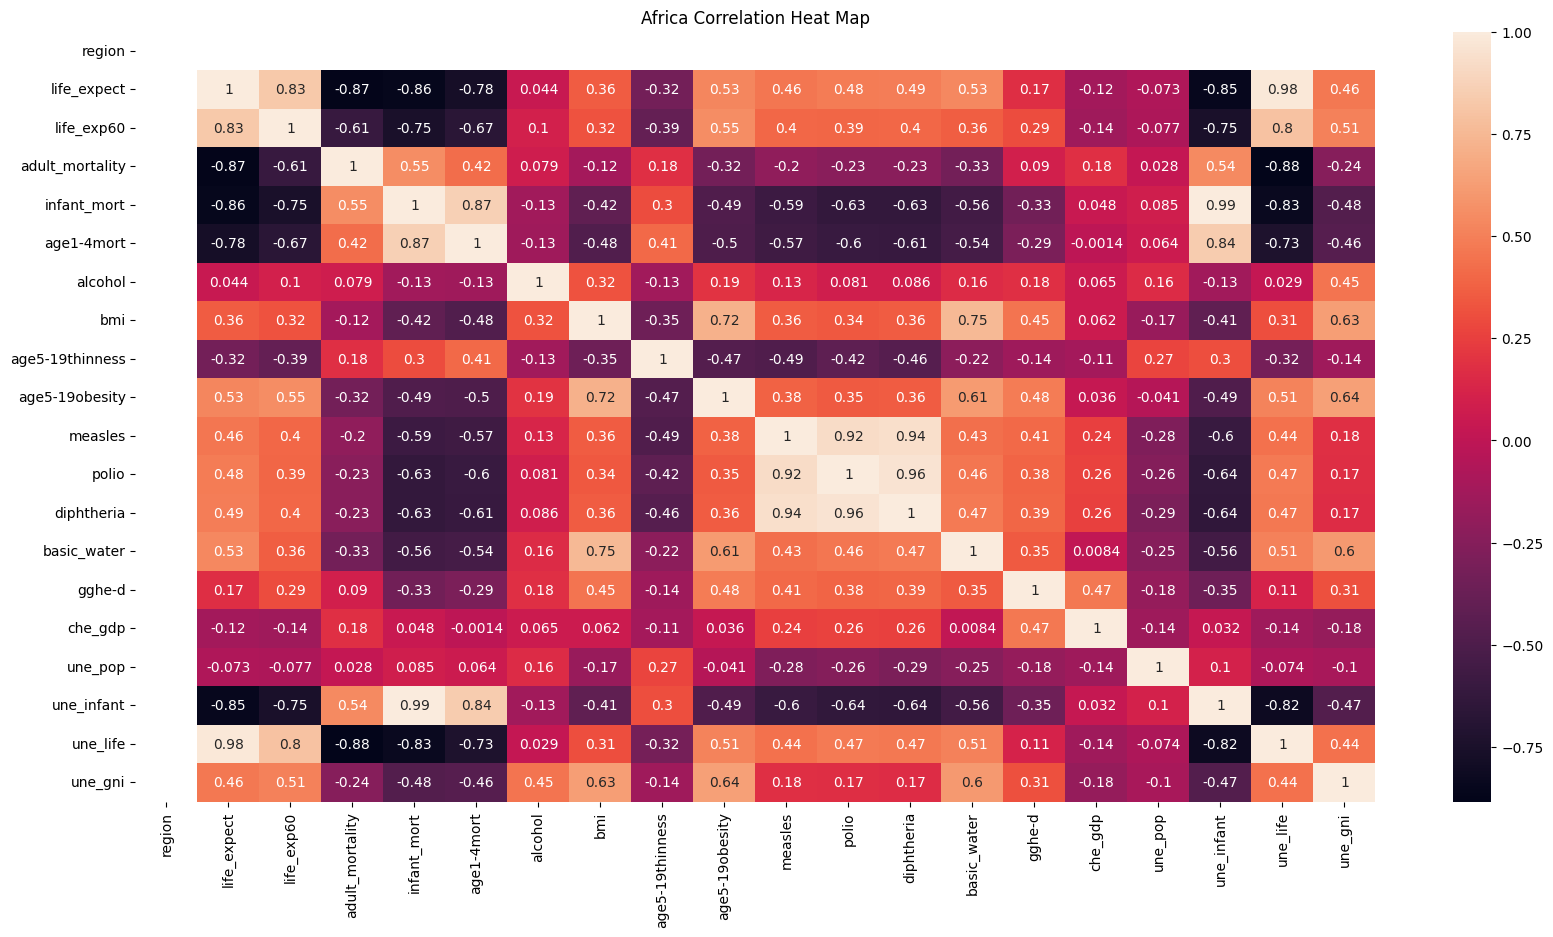

In [ ]:
#Heatmap of Africa
#df.drop(['region'], axis = 1)
plt.figure(figsize=(20,10))
data_africa = df_Africa.corr()
plt.title('Africa Correlation Heat Map')
highest_corr = data_africa.unstack().sort_values(ascending=False).drop_duplicates()
lowest_corr = data_africa.unstack().sort_values().drop_duplicates()
sns.heatmap(data_africa,annot=True)
print("The areas with the highest corrilation is \n" , highest_corr)
print("The areas with the lowest corrilation is \n" , lowest_corr)



The areas with the highest corrilation is 
 life_expect      life_expect        1.000000
une_infant       infant_mort        0.989843
life_expect      une_life           0.930075
diphtheria       polio              0.909967
age1-4mort       une_infant         0.865156
                                      ...   
infant_mort      une_life          -0.899419
adult_mortality  une_life          -0.902894
une_life         une_infant        -0.904798
life_expect      adult_mortality   -0.966722
region           region                  NaN
Length: 173, dtype: float64
The areas with the lowest corrilation is 
 life_expect  adult_mortality   -0.966722
une_infant   une_life          -0.904798
une_life     adult_mortality   -0.902894
infant_mort  une_life          -0.899419
une_infant   life_expect       -0.879821
                                  ...   
diphtheria   polio              0.909967
une_life     life_expect        0.930075
infant_mort  une_infant         0.989843
life_expect  life_exp

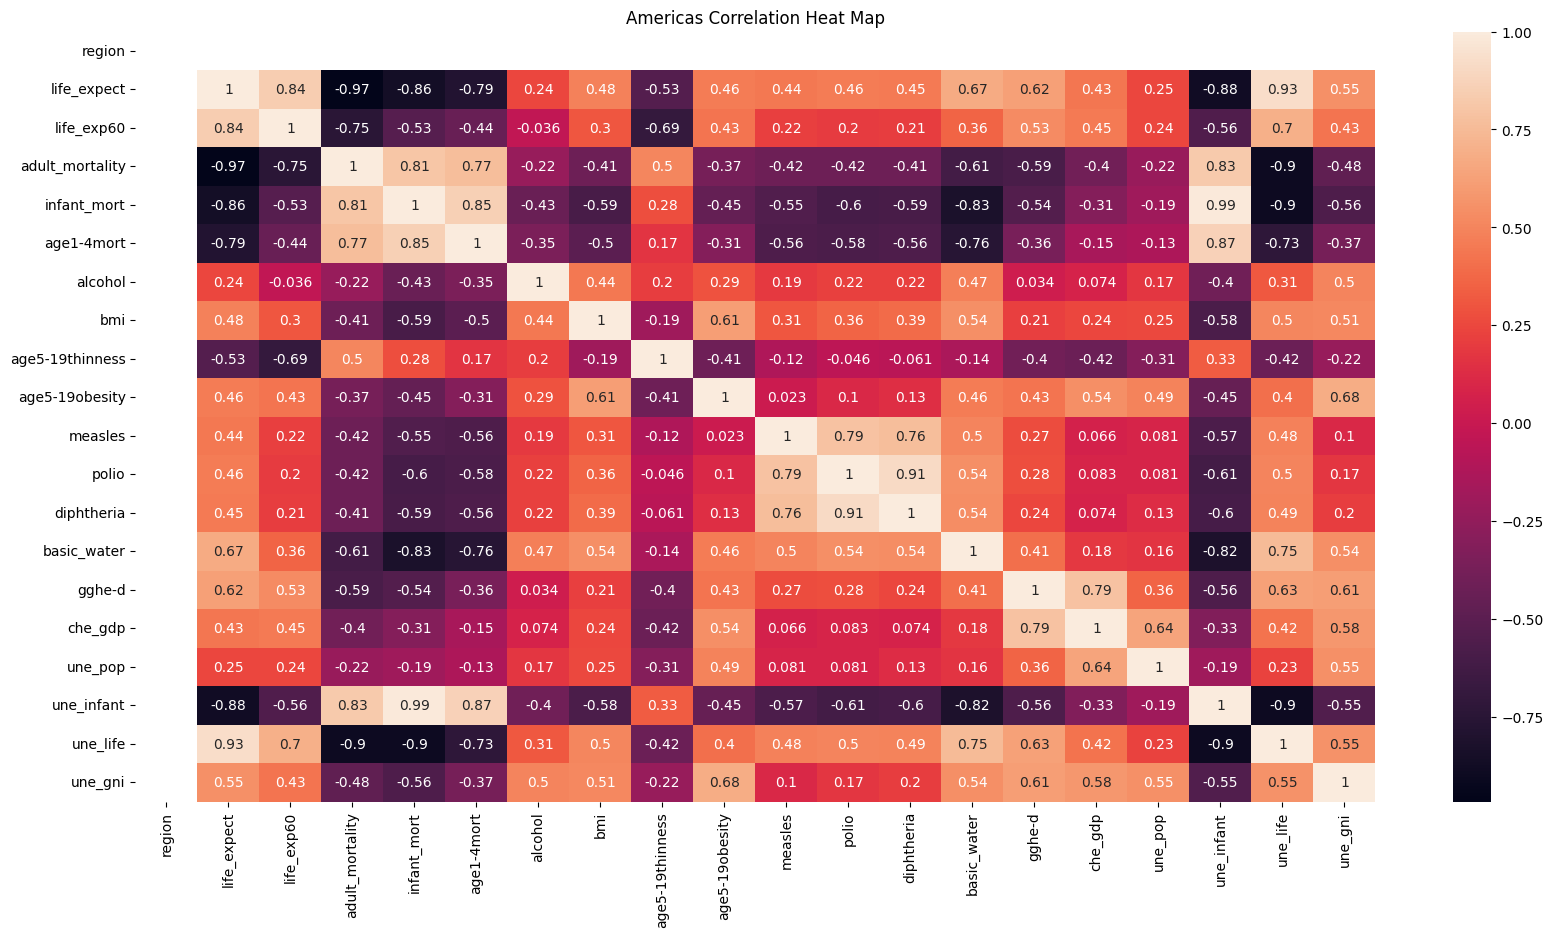

In [ ]:
#Heatmap of Americas

plt.figure(figsize=(20,10))
data_americas = df_Americas.corr()
plt.title('Americas Correlation Heat Map')
highest_corr = data_americas.unstack().sort_values(ascending=False).drop_duplicates()
lowest_corr = data_americas.unstack().sort_values().drop_duplicates()
sns.heatmap(data_americas,annot=True)
print("The areas with the highest corrilation is \n" , highest_corr)
print("The areas with the lowest corrilation is \n" , lowest_corr)



<ipython-input-89-af92eb45e1f5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_EM= df_EM.corr()


The areas with the highest corrilation is 
 year             year           1.000000
infant_mort      une_infant     0.998464
polio            diphtheria     0.992132
une_life         life_expect    0.983508
measles          polio          0.973605
                                  ...   
life_expect      une_infant    -0.941920
une_life         infant_mort   -0.951114
                 une_infant    -0.954630
adult_mortality  life_expect   -0.972617
region           region              NaN
Length: 192, dtype: float64
The areas with the lowest corrilation is 
 adult_mortality  life_expect   -0.972617
une_life         une_infant    -0.954630
infant_mort      une_life      -0.951114
life_expect      une_infant    -0.941920
adult_mortality  une_life      -0.941491
                                  ...   
une_life         life_expect    0.983508
polio            diphtheria     0.992132
une_infant       infant_mort    0.998464
year             year           1.000000
region           region 

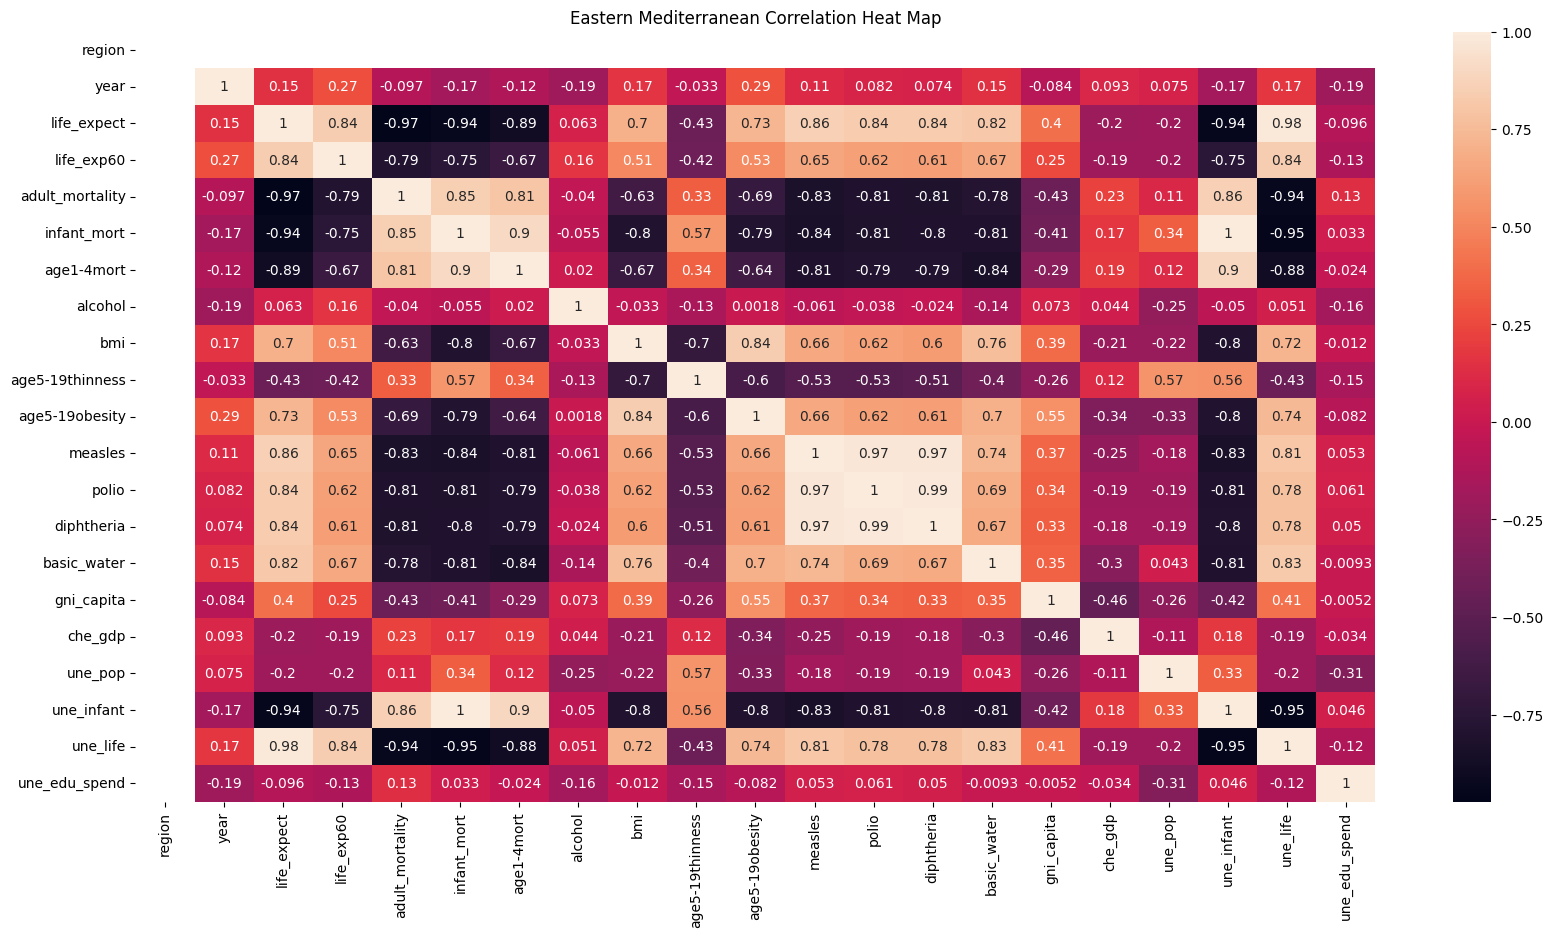

In [ ]:
#Heatmap of Eastern Mediterranean
plt.figure(figsize=(20,10))
data_EM= df_EM.corr()
plt.title('Eastern Mediterranean Correlation Heat Map')
highest_corr = data_EM.unstack().sort_values(ascending=False).drop_duplicates()
lowest_corr = data_EM.unstack().sort_values().drop_duplicates()
sns.heatmap(data_EM,annot=True)
print("The areas with the highest corrilation is \n" , highest_corr)
print("The areas with the lowest corrilation is \n" , lowest_corr)




<ipython-input-90-5e56c83256d1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_europe= df_Europe.corr()


The areas with the highest corrilation is 
 year             year               1.000000
une_infant       infant_mort        0.994230
life_expect      une_life           0.992871
infant_mort      age1-4mort         0.969040
life_expect      life_exp60         0.966097
                                      ...   
age5-19thinness  une_life          -0.826653
life_exp60       adult_mortality   -0.858053
une_life         adult_mortality   -0.900162
adult_mortality  life_expect       -0.919269
region           region                  NaN
Length: 192, dtype: float64
The areas with the lowest corrilation is 
 life_expect  adult_mortality   -0.919269
une_life     adult_mortality   -0.900162
life_exp60   adult_mortality   -0.858053
une_life     age5-19thinness   -0.826653
life_expect  age5-19thinness   -0.814954
                                  ...   
age1-4mort   infant_mort        0.969040
une_life     life_expect        0.992871
infant_mort  une_infant         0.994230
year         year    

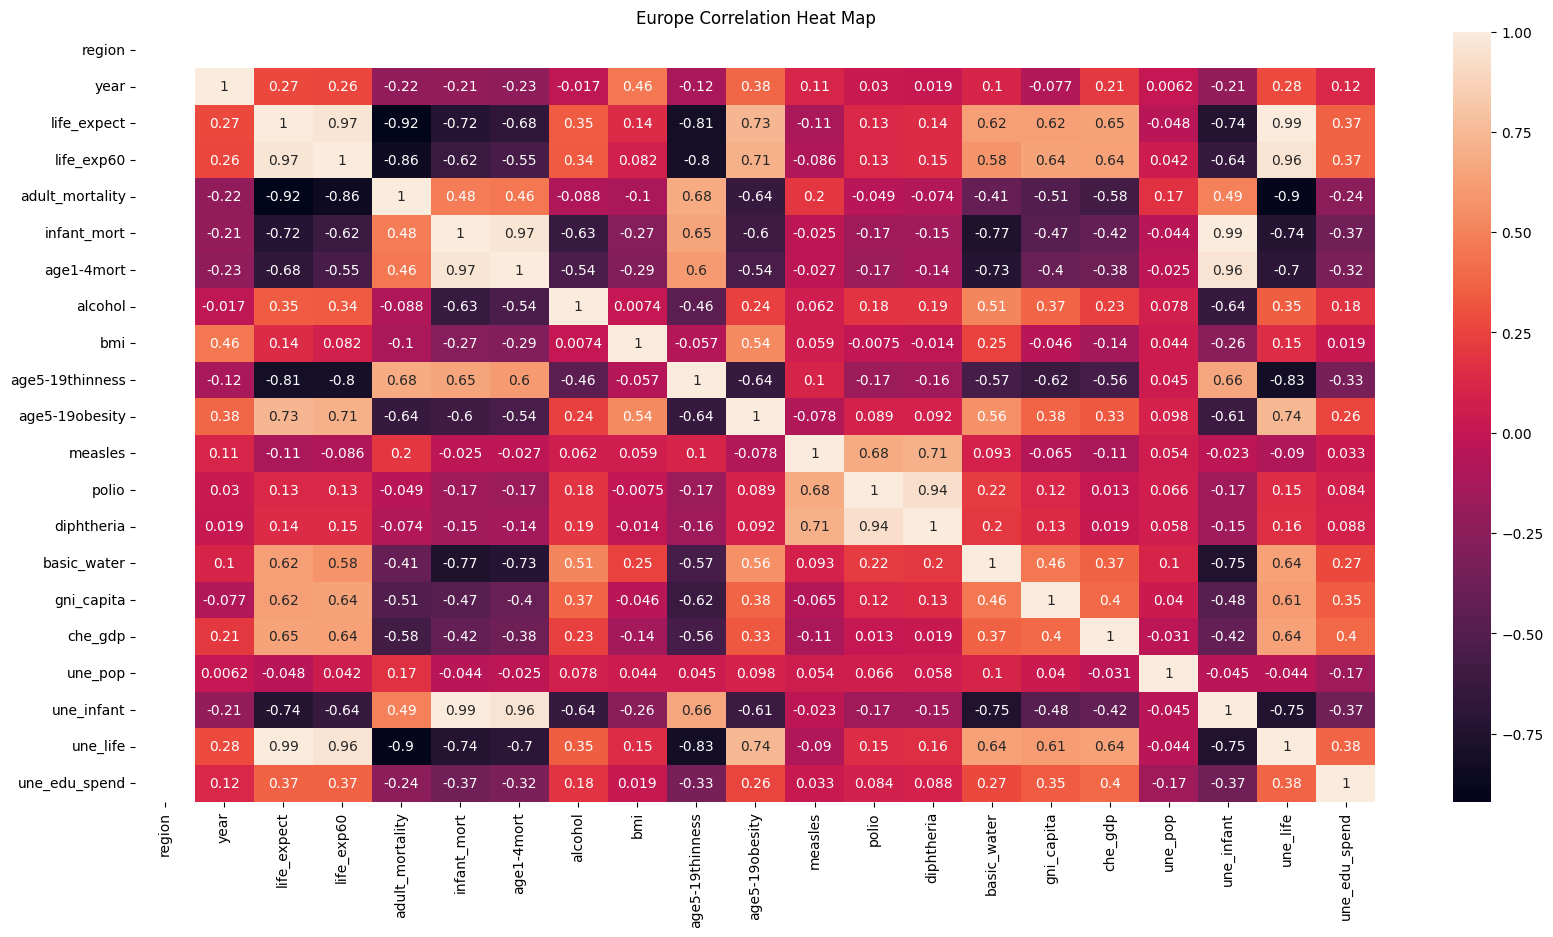

In [ ]:
#Heatmap of Europe
plt.figure(figsize=(20,10))
data_europe= df_Europe.corr()
plt.title('Europe Correlation Heat Map')
highest_corr = data_europe.unstack().sort_values(ascending=False).drop_duplicates()
lowest_corr = data_europe.unstack().sort_values().drop_duplicates()
sns.heatmap(data_europe,annot=True)
print("The areas with the highest corrilation is \n" , highest_corr)
print("The areas with the lowest corrilation is \n" , lowest_corr)

<ipython-input-91-3bdc534f4960>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_SEA= df_SEA.corr()


The areas with the highest corrilation is 
 year         year           1.000000
une_infant   infant_mort    0.995930
life_expect  une_life       0.980352
age1-4mort   une_infant     0.940389
measles      polio          0.939457
                              ...   
life_expect  infant_mort   -0.922590
             une_infant    -0.925246
une_life     infant_mort   -0.927787
             une_infant    -0.933537
region       region              NaN
Length: 192, dtype: float64
The areas with the lowest corrilation is 
 une_life     une_infant    -0.933537
infant_mort  une_life      -0.927787
life_expect  une_infant    -0.925246
infant_mort  life_expect   -0.922590
age1-4mort   une_life      -0.908300
                              ...   
             une_infant     0.940389
une_life     life_expect    0.980352
une_infant   infant_mort    0.995930
year         year           1.000000
region       region              NaN
Length: 192, dtype: float64


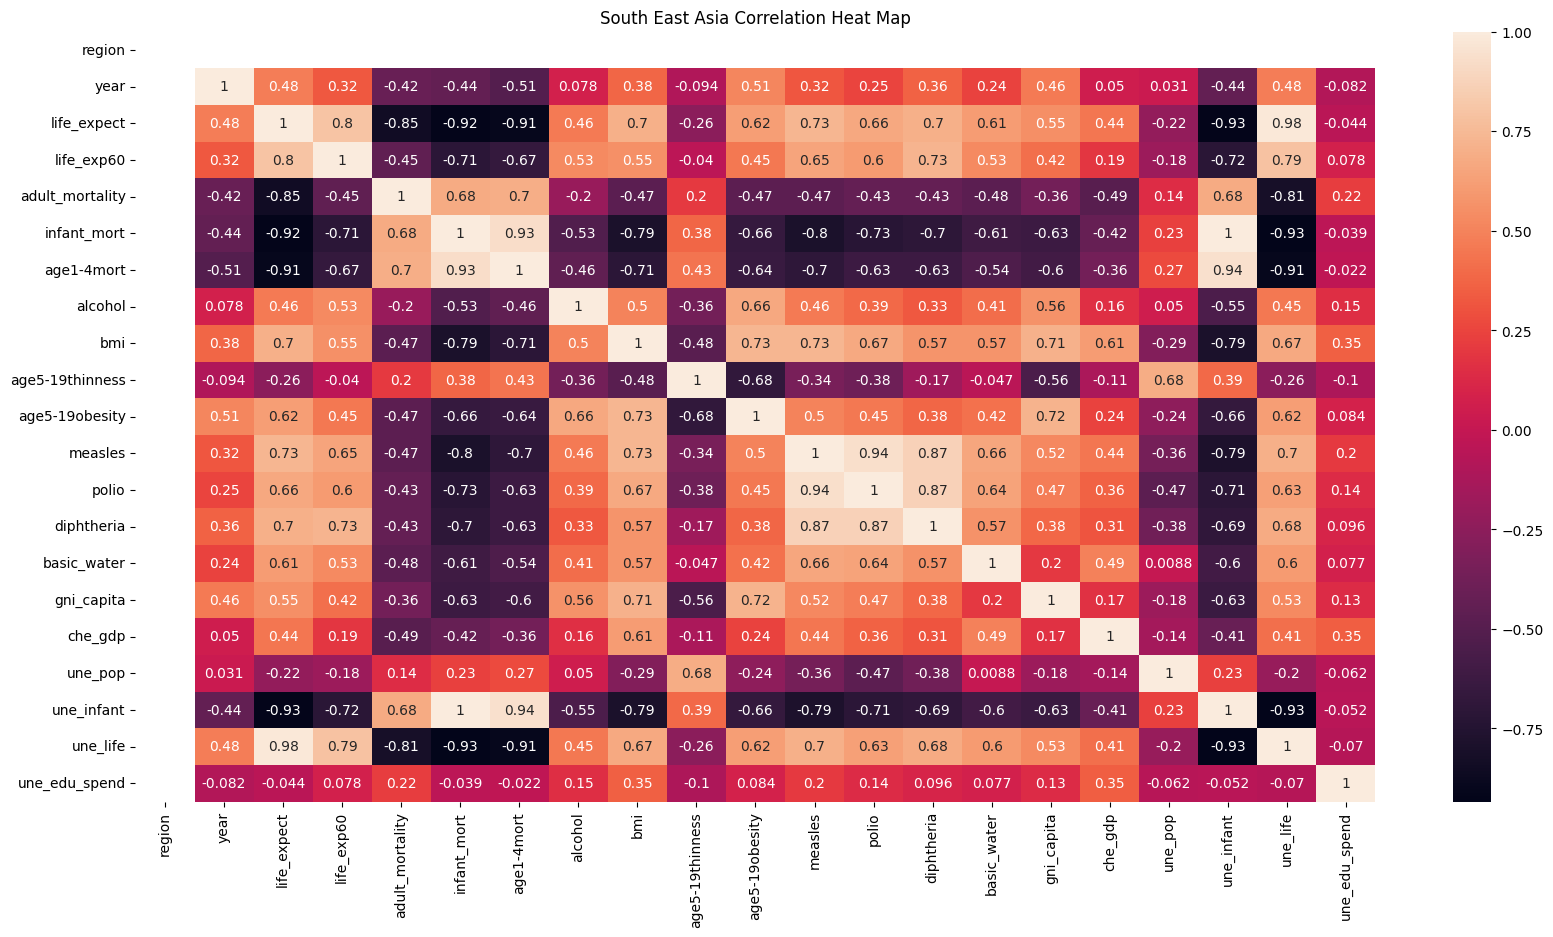

In [ ]:
#Heatmap of South East Asia
plt.figure(figsize=(20,10))
data_SEA= df_SEA.corr()
plt.title('South East Asia Correlation Heat Map')
highest_corr = data_SEA.unstack().sort_values(ascending=False).drop_duplicates()
lowest_corr = data_SEA.unstack().sort_values().drop_duplicates()
sns.heatmap(data_SEA,annot=True)
print("The areas with the highest corrilation is \n" , highest_corr)
print("The areas with the lowest corrilation is \n" , lowest_corr)

<ipython-input-92-12058d5ac3d3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_WP= df_WP.corr()


The areas with the highest corrilation is 
 year         year               1.000000
infant_mort  une_infant         0.986989
une_life     life_expect        0.982391
infant_mort  age1-4mort         0.962704
age1-4mort   une_infant         0.948967
                                  ...   
life_exp60   adult_mortality   -0.894456
life_expect  une_infant        -0.910649
une_life     adult_mortality   -0.945302
life_expect  adult_mortality   -0.966635
region       region                  NaN
Length: 192, dtype: float64
The areas with the lowest corrilation is 
 adult_mortality  life_expect       -0.966635
une_life         adult_mortality   -0.945302
life_expect      une_infant        -0.910649
life_exp60       adult_mortality   -0.894456
life_expect      infant_mort       -0.890141
                                      ...   
age1-4mort       infant_mort        0.962704
une_life         life_expect        0.982391
infant_mort      une_infant         0.986989
year             year        

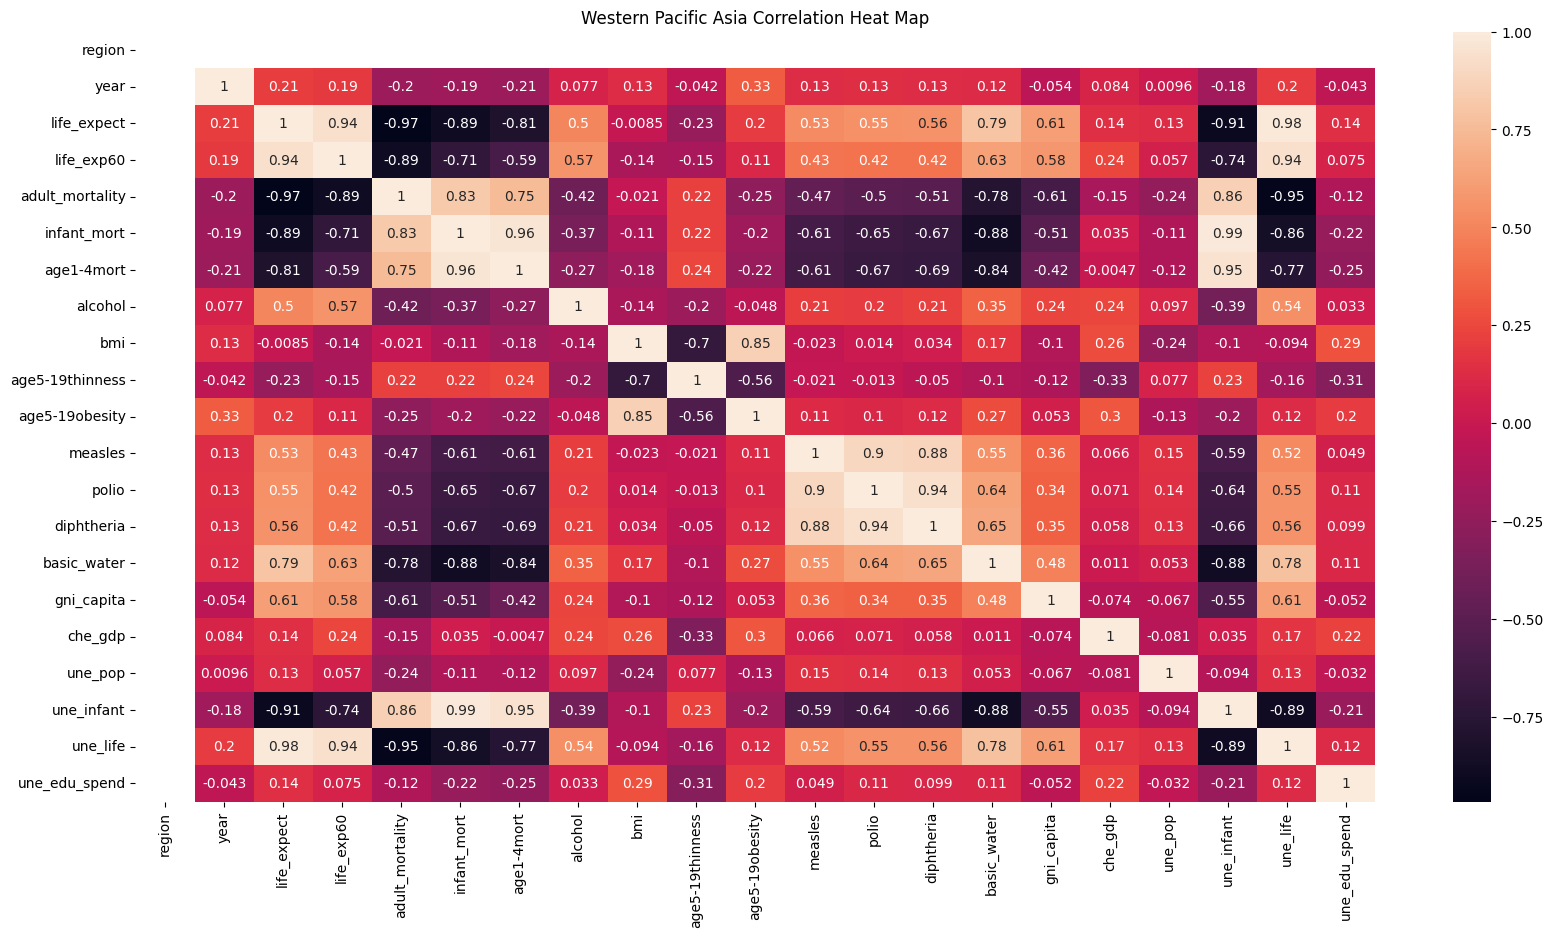

In [ ]:
#Heatmap of Western Pacific
plt.figure(figsize=(20,10))
data_WP= df_WP.corr()
plt.title('Western Pacific Asia Correlation Heat Map')
highest_corr = data_WP.unstack().sort_values(ascending=False).drop_duplicates()
lowest_corr = data_WP.unstack().sort_values().drop_duplicates()
sns.heatmap(data_WP,annot=True)
print("The areas with the highest corrilation is \n" , highest_corr)
print("The areas with the lowest corrilation is \n" , lowest_corr)




life_expect  3042    84.16616
             3041    83.96438
             3040    83.77585
             3039    83.53643
             3038    83.30347
                       ...   
region       2667     4.00000
             1995     3.00000
             1394     2.00000
             976      1.00000
             114      0.00000
Length: 3115, dtype: float64
region       45       0.00000
             1170     1.00000
             1501     2.00000
             2283     3.00000
             2703     4.00000
                       ...   
life_expect  3038    83.30347
             3039    83.53643
             3040    83.77585
             3041    83.96438
             3042    84.16616
Length: 3115, dtype: float64


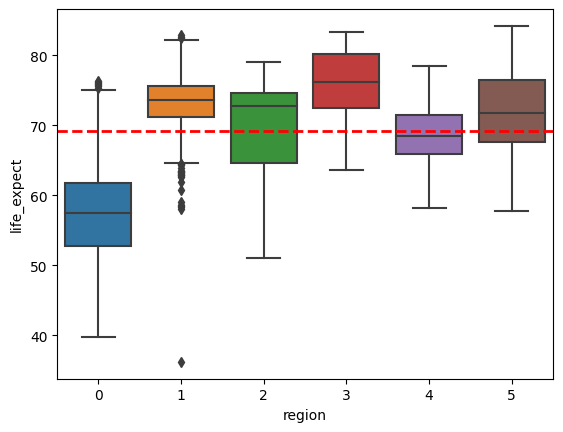

In [ ]:
#Life expectancy boxplot by region
var = 'region'
data_plt = pd.concat([df['life_expect'], df[var]], axis=1)
fig = sns.boxplot(x=var, y="life_expect", data=data_plt)
plt.axhline(df.life_expect.mean(),color='r',linestyle='dashed',linewidth=2)
highest_exp = data_plt.unstack().sort_values(ascending=False).drop_duplicates()
lowest_exp = data_plt.unstack().sort_values().drop_duplicates()
print(highest_exp)
print(lowest_exp)

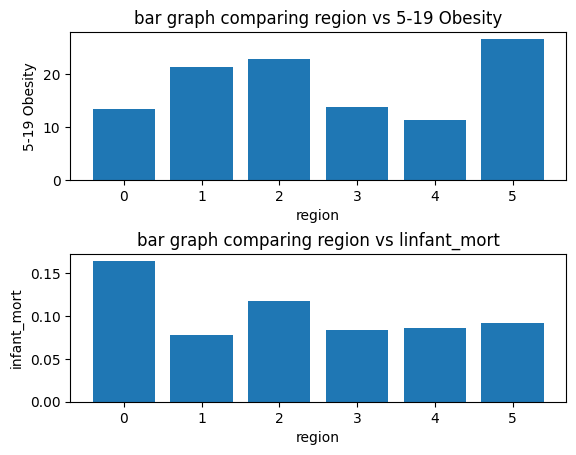

In [ ]:
#split graph compare hospitals and regions then regions to life exp

#region, hiv
#top
plt.subplot(2,1,1)
plt.bar(df['region'],df['age5-19obesity'])
plt.xlabel('region')
plt.ylabel('5-19 Obesity')
plt.title('bar graph comparing region vs 5-19 Obesity')
#bottom
plt.subplot(2,1,2)
plt.bar(df['region'],df['infant_mort'])
plt.xlabel('region')
plt.ylabel('infant_mort')
plt.title('bar graph comparing region vs linfant_mort')
#create space between the two
plt.subplots_adjust(hspace=0.5)





In [ ]:
df.columns

Index(['country', 'country_code', 'region', 'year', 'life_expect',
       'life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort', 'alcohol',
       'bmi', 'age5-19thinness', 'age5-19obesity', 'measles', 'polio',
       'diphtheria', 'basic_water', 'gni_capita', 'che_gdp', 'une_pop',
       'une_infant', 'une_life', 'une_edu_spend'],
      dtype='object')

Text(0, 0.5, 'life exp')

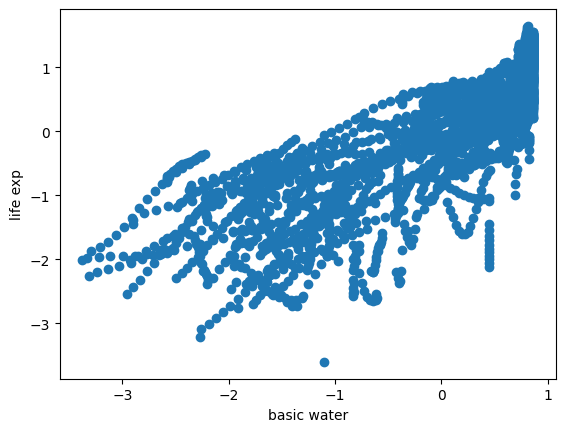

In [ ]:
plt.scatter(df['basic_water'], df['life_expect'])
plt.xlabel('basic water')
plt.ylabel('life exp')

Text(0, 0.5, 'life exp')

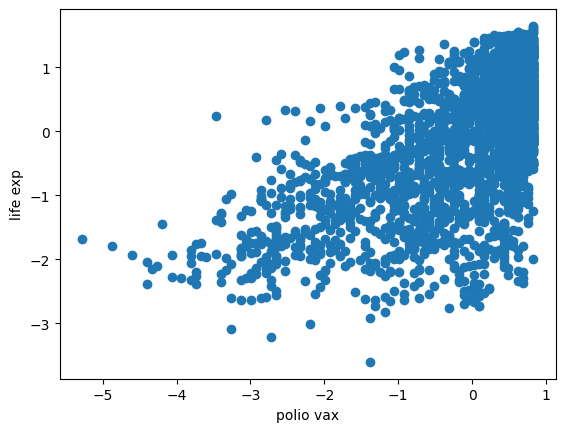

In [ ]:
plt.scatter(df['polio'], df['life_expect'])
plt.xlabel('polio vax')
plt.ylabel('life exp')

Text(0, 0.5, 'life exp at birth, total years')

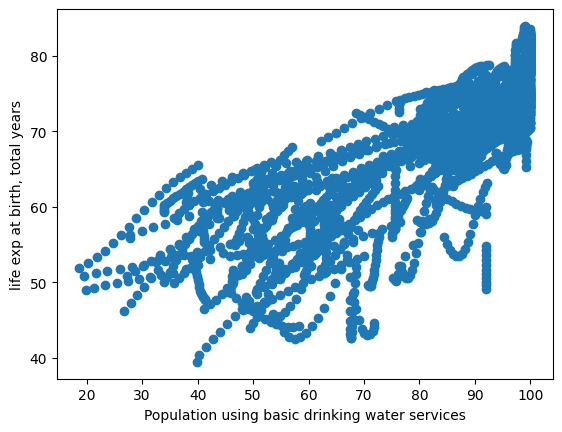

In [ ]:
plt.scatter(df['basic_water'], df['une_life'])
plt.xlabel('Population using basic drinking water services')
plt.ylabel('life exp at birth, total years')

Text(0, 0.5, 'Death rate between ages 1 - 4 ')

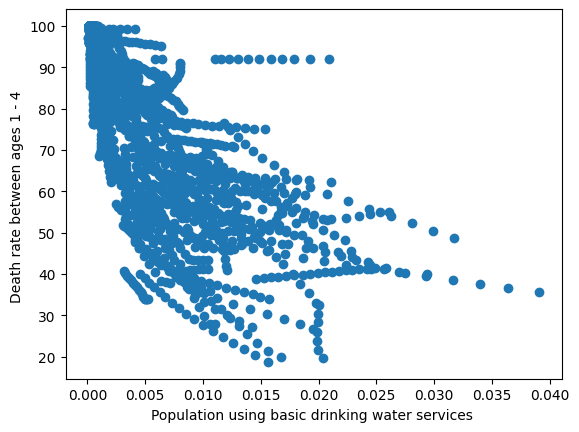

In [ ]:
plt.scatter(df['age1-4mort'], df['basic_water'])
plt.xlabel('Population using basic drinking water services ')
plt.ylabel('Death rate between ages 1 - 4 ')

Text(0, 0.5, 'Gross national income per capita (PPP int. $) ')

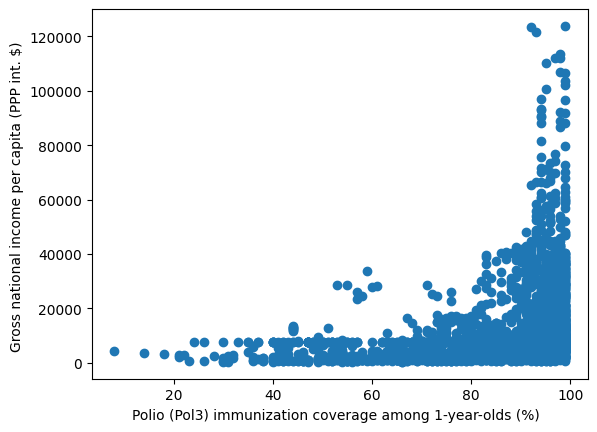

In [ ]:
plt.scatter(df['polio'], df['gni_capita'])
plt.xlabel('Polio (Pol3) immunization coverage among 1-year-olds (%)  ')
plt.ylabel('Gross national income per capita (PPP int. $) ')

Text(0, 0.5, 'number')

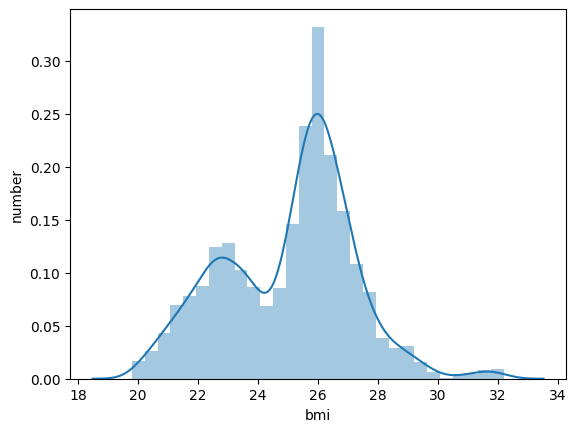

In [ ]:
warnings.filterwarnings('ignore')
sns.distplot(df['bmi'])
plt.xlabel("bmi")
plt.ylabel("probability density")

In [ ]:
set(df['region'].tolist())

{-1.231719194627471,
 -0.6290330646359544,
 -0.02634693464443791,
 0.5763391953470787,
 1.1790253253385952,
 1.7817114553301119}

In [ ]:
target_list = df['region'].tolist()
print(set(target_list))

{-0.6290330646359544, 0.5763391953470787, 1.1790253253385952, 1.7817114553301119, -0.02634693464443791, -1.231719194627471}


In [ ]:
#Convert to numpy - regression

x_columns = df.columns.drop('region')
x = df[x_columns].values

dummies = pd.get_dummies(df['region']) # Classification
species = dummies.columns
y = dummies.values





In [ ]:
y[100]

array([1, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
#train data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2488, 19)
(2488, 6)
(623, 19)
(623, 6)


In [ ]:
y_train.shape[1]

6

In [ ]:
#Build neural network by adding layers
# Build neural network
model = Sequential()
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(y_train.shape[1],activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 50)                1000      
                                                                 
 dense_54 (Dense)            (None, 25)                1275      
                                                                 
 dense_55 (Dense)            (None, 6)                 156       
                                                                 
Total params: 2431 (9.50 KB)
Trainable params: 2431 (9.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training our neural network
model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=1,epochs=200)

Epoch 1/200
78/78 [==============================] - 1s 13ms/step - loss: nan - accuracy: 0.2476 - val_loss: nan - val_accuracy: 0.2937
Epoch 2/200
78/78 [==============================] - 1s 11ms/step - loss: nan - accuracy: 0.2476 - val_loss: nan - val_accuracy: 0.2937
Epoch 3/200
78/78 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.2476 - val_loss: nan - val_accuracy: 0.2937
Epoch 4/200
78/78 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.2476 - val_loss: nan - val_accuracy: 0.2937
Epoch 5/200
78/78 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.2476 - val_loss: nan - val_accuracy: 0.2937
Epoch 6/200
78/78 [==============================] - 2s 19ms/step - loss: nan - accuracy: 0.2476 - val_loss: nan - val_accuracy: 0.2937
Epoch 7/200
78/78 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.2476 - val_loss: nan - val_accuracy: 0.2937
Epoch 8/200
78/78 [==============================] -

In [ ]:
# Predict
from sklearn.metrics import accuracy_score

pred = model.predict(x_test)

20/20 [==============================] - 0s 2ms/step


In [ ]:
len(pred)

623

In [ ]:
pred[1]


array([nan, nan, nan, nan, nan, nan], dtype=float32)

In [ ]:
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)

print(predict_classes[:10])
print(expected_classes[:10])

[0 0 0 0 0 0 0 0 0 0]
[0 3 0 5 0 0 0 0 2 1]


In [ ]:
from sklearn import metrics

correct = accuracy_score(expected_classes,predict_classes)
print(f"Accuracy: {correct}")

Accuracy: 0.29373996789727125


In [ ]:
# Measure MSE error.
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.
rmse = np.sqrt(score)
print("Final score (RMSE): {}".format(rmse))

In [ ]:
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [ ]:
# Plot the chart
chart_regression(pred.flatten(),y_test)

### America prediction model

In [ ]:
x_columns = df.columns.drop('life_expect')
#x_columns = df_Americas.columns.drop('life_expect')
x = df[x_columns].values
y = df['life_expect'].values

#dummies = pd.get_dummies(df['adult_mortality']) # Classification
#species = dummies.columns
#y = dummies.values




In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2488, 19)
(2488,)
(623, 19)
(623,)


In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(10, activation='relu')) # Hidden 3
model.add(Dense(1)) # Output
#model.add(Dense(y_train.shape[1],activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam')
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 50)                1000      
                                                                 
 dense_42 (Dense)            (None, 25)                1275      
                                                                 
 dense_43 (Dense)            (None, 10)                260       
                                                                 
 dense_44 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2546 (9.95 KB)
Trainable params: 2546 (9.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training our neural network
model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


78/78 - 2s - loss: nan - val_loss: nan - 2s/epoch - 22ms/step
Epoch 2/50
78/78 - 0s - loss: nan - val_loss: nan - 295ms/epoch - 4ms/step
Epoch 3/50
78/78 - 0s - loss: nan - val_loss: nan - 341ms/epoch - 4ms/step
Epoch 4/50
78/78 - 0s - loss: nan - val_loss: nan - 350ms/epoch - 4ms/step
Epoch 5/50
78/78 - 0s - loss: nan - val_loss: nan - 289ms/epoch - 4ms/step
Epoch 6/50
78/78 - 0s - loss: nan - val_loss: nan - 286ms/epoch - 4ms/step
Epoch 7/50
78/78 - 0s - loss: nan - val_loss: nan - 407ms/epoch - 5ms/step
Epoch 8/50
78/78 - 0s - loss: nan - val_loss: nan - 357ms/epoch - 5ms/step
Epoch 9/50
78/78 - 0s - loss: nan - val_loss: nan - 407ms/epoch - 5ms/step
Epoch 10/50
78/78 - 0s - loss: nan - val_loss: nan - 373ms/epoch - 5ms/step
Epoch 11/50
78/78 - 0s - loss: nan - val_loss: nan - 319ms/epoch - 4ms/step
Epoch 12/50
78/78 - 0s - loss: nan - val_loss: nan - 295ms/epoch - 4ms/step
Epoch 13/50
78/78 - 0s - loss: nan - val_loss: nan - 293ms/epoch - 4ms/step
Epoch 14/50
78/78 - 0s - loss: nan

In [ ]:
pred = model.predict(x_test)
pred[:5]

20/20 [==============================] - 0s 2ms/step


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [ ]:
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

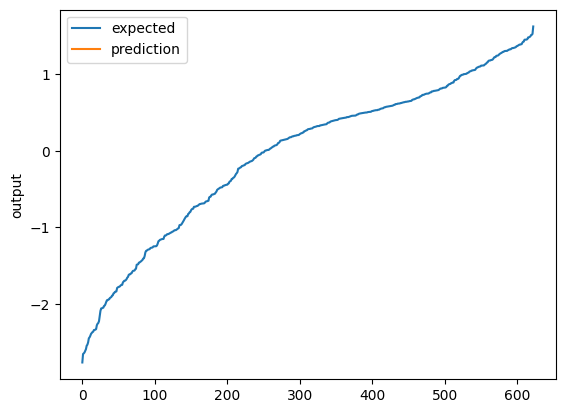

In [ ]:
# Plot the chart
chart_regression(pred.flatten(),y_test)